<h3 style="color:red;">1. Crea un notebook, carga los csv. responde y justifica.</h3>

In [78]:
import pandas as pd


# cargamos los .csv
categories = pd.read_csv(r"..\data\categories.csv")
cities = pd.read_csv(r"..\data\cities.csv")
countries = pd.read_csv(r"..\data\countries.csv")
customers = pd.read_csv(r"..\data\customers.csv")
employees = pd.read_csv(r"..\data\employees.csv")
products = pd.read_csv(r"..\data\products.csv")
sales = pd.read_csv(r"..\data\sales.csv")

Exploramos los datos de la tabla mas volumetrica

In [79]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         float64
 7   SalesDate          object 
 8   TransactionNumber  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 464.0+ MB


In [80]:
sales.describe()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice
count,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6758125.0
mean,3.379063e+06,1.199972e+01,4.939567e+04,2.265663e+02,1.300401e+01,2.996787e-02,0.0
std,1.950903e+06,6.632689e+00,2.850504e+04,1.319970e+02,7.209701e+00,6.398096e-02,0.0
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.0
25%,1.689532e+06,6.000000e+00,2.470700e+04,1.140000e+02,7.000000e+00,0.000000e+00,0.0
50%,3.379063e+06,1.200000e+01,4.941400e+04,2.270000e+02,1.300000e+01,0.000000e+00,0.0
75%,5.068594e+06,1.800000e+01,7.407500e+04,3.400000e+02,1.900000e+01,0.000000e+00,0.0
max,6.758125e+06,2.300000e+01,9.875900e+04,4.105600e+04,2.500000e+01,2.000000e-01,0.0


In [81]:
# verificamos valores nulos
round(sales.isnull().sum()/len(sales) * 100, 4)

SalesID              0.0000
SalesPersonID        0.0000
CustomerID           0.0000
ProductID            0.0000
Quantity             0.0000
Discount             0.0000
TotalPrice           0.0000
SalesDate            0.9992
TransactionNumber    0.0000
dtype: float64

Como los valores nulos en SalesDate son solamente el 1% vamos a eliminar esas filas:

In [82]:
sales = sales.dropna(subset=["SalesDate"])
round(sales.isnull().sum()/len(sales) * 100, 4)

SalesID              0.0
SalesPersonID        0.0
CustomerID           0.0
ProductID            0.0
Quantity             0.0
Discount             0.0
TotalPrice           0.0
SalesDate            0.0
TransactionNumber    0.0
dtype: float64

In [83]:
print(sales[sales.duplicated()])

Empty DataFrame
Columns: [SalesID, SalesPersonID, CustomerID, ProductID, Quantity, Discount, TotalPrice, SalesDate, TransactionNumber]
Index: []


Observamos que no hay filas duplicadas en la tabla sales

In [84]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ProductID     452 non-null    int64  
 1   ProductName   452 non-null    object 
 2   Price         452 non-null    float64
 3   CategoryID    452 non-null    int64  
 4   Class         452 non-null    object 
 5   ModifyDate    452 non-null    object 
 6   Resistant     452 non-null    object 
 7   IsAllergic    452 non-null    object 
 8   VitalityDays  452 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 31.9+ KB


<h3 style="color:red;">El campo TotalPrice en la tabla sales no tiene valores válidos. Utilizando la información de precios de la tabla products, </h3>
<h3 style="color:red;">calcula el valor real de la venta para cada registro y almacena en una nueva columna</h3>

TotalPriceCalculated=(Quantity×UnitPrice)×(1−Discount)


In [85]:
# TotalPriceCalculated=(Quantity×UnitPrice)×(1−Discount)

sales_products = pd.merge(sales, products[["ProductID", "Price"]], on="ProductID", how="left")

sales_products



,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780
...,...,...,...,...,...,...,...,...,...,...
6690594,6758121,10,50938,300,13,0.0,0.0,2018-04-20 22:39:03.150,AHVBHVO7632V5YYD2VJT,69.5694
6690595,6758122,18,85668,452,22,0.1,0.0,2018-01-13 15:08:18.700,M4IA0FS13J9F0GJD4BX8,28.5653
6690596,6758123,21,68409,405,18,0.0,0.0,2018-01-18 12:05:16.950,7VZJ77UGBSX2SNCC1GFW,0.4278
6690597,6758124,17,90315,104,23,0.0,0.0,2018-02-26 08:13:37.850,3JTF5IF0YJLLXF9IRS8X,98.2471


verificamos valores nulos:

In [86]:
round(sales_products.isnull().sum()/len(sales_products) *100,4)

SalesID              0.0000
SalesPersonID        0.0000
CustomerID           0.0000
ProductID            0.0000
Quantity             0.0000
Discount             0.0000
TotalPrice           0.0000
SalesDate            0.0000
TransactionNumber    0.0000
Price                0.0003
dtype: float64

como hay una cantidad despreciable de valores nulos procedemos a eliminarlos:

In [87]:
print(len(sales_products))
sales_products = sales_products.dropna()
print(len(sales_products))

6690599
6690582


In [88]:
# TotalPriceCalculated=(Quantity×UnitPrice)×(1−Discount)
pd.options.mode.chained_assignment = None  # Desactiva el SettingWithCopyWarning

sales_products["TotalPriceCalculated"] = (sales_products["Quantity"] * sales_products["Price"]) * (1 - sales_products["Discount"])

sales_products.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,TotalPriceCalculated
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337,309.63590
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460,437.82200
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184,1896.44160
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167,1236.01384
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780,719.80200


<h3 style="color:red;">2. Detecta los outliers en la columna de ventas totales (TotalPriceCalculated)</h3>
<h3 style="color:red;">Utilizando el criterio del rango intercuartílico (IQR). </h3>

<h3 style="color:red;">Luego, crea una nueva columna llamada IsOutlier que tenga el valor 1 si el registro es un outlier y 0 en caso contrario.</h3>

<Axes: >

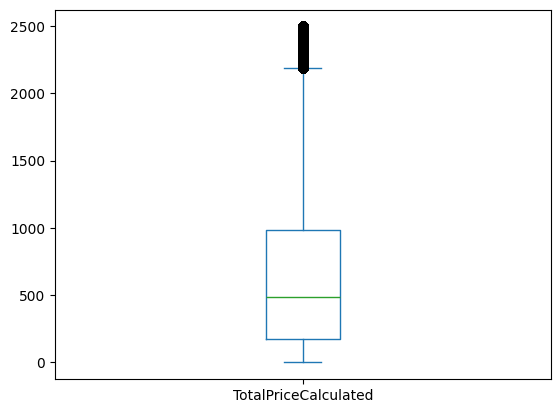

In [89]:
sales_products["TotalPriceCalculated"].plot(kind="box")

Este grafico en forma de caja nos indica que pueden haber varios outliers. Vamos a calcularlos ...

In [90]:
# calculamos los cuartiles
Q1 = sales_products["TotalPriceCalculated"].quantile(0.25)
Q3 = sales_products["TotalPriceCalculated"].quantile(0.75)
IQR = Q3 - Q1

# cota inferior
lower_bound = Q1 - 1.5 * IQR
# cota superior
upper_bound = Q3 + 1.5 * IQR

sales_products["IsOutlier"] = (
    (sales_products["TotalPriceCalculated"] < lower_bound) 
    | (sales_products["TotalPriceCalculated"] > upper_bound)).astype(int)

sales_products.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,TotalPriceCalculated,IsOutlier
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337,309.63590,0
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460,437.82200,0
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184,1896.44160,0
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167,1236.01384,0
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780,719.80200,0


verificamos % de outliers:

In [91]:
sales_products["IsOutlier"].value_counts() /len(sales_products) * 100

IsOutlier
0    99.28634
1     0.71366
Name: count, dtype: float64



<h3 style="color:red;">3. A partir de la columna SalesDate, crea una nueva columna que contenga únicamente la hora de la venta.</h3>

In [92]:
sales_products["SalesDate"] = pd.to_datetime(sales_products["SalesDate"], errors="coerce")
sales_products["hora"] = sales_products["SalesDate"].dt.hour

sales_products[["SalesDate","hora"]]

,SalesDate,hora
0,2018-02-05 07:38:25.430,7
1,2018-02-02 16:03:31.150,16
2,2018-05-03 19:31:56.880,19
3,2018-04-07 14:43:55.420,14
4,2018-02-12 15:37:03.940,15
...,...,...
6690594,2018-04-20 22:39:03.150,22
6690595,2018-01-13 15:08:18.700,15
6690596,2018-01-18 12:05:16.950,12
6690597,2018-02-26 08:13:37.850,8


<h3 style="color:red;">Luego, identifica en qué hora del día se concentran más ventas totales (TotalPriceCalculated)</h3>

In [93]:

Total_Sales_Hour_Grouped = (sales_products.groupby("hora")["TotalPriceCalculated"].sum()
                            .reset_index(name="TotalPricePerHour").astype("Float64")
                            )

total_sales = Total_Sales_Hour_Grouped["TotalPricePerHour"].sum()

Total_Sales_Hour_Grouped["total %"] = (Total_Sales_Hour_Grouped["TotalPricePerHour"] / total_sales * 100)

print(Total_Sales_Hour_Grouped.sort_values(by="total %", ascending=False).reset_index(drop=True).head(1))


   hora  TotalPricePerHour   total %
0  16.0    179014421.23606  4.189221


Conclusion: Vemos que a las 16hs se concentra la mayor cantidad de ventas siendo el 4.2 % del total

<h3 style="color:red;">¿La empresa vende más durante los días de semana o en el fin de semana? </h3>

<h3 style="color:red;">Utiliza la columna SalesDate para identificar el día de la semana de cada venta, clasifica los registros como Entre semana o Fin de semana, </h3>

<h3 style="color:red;">y compara el total de ventas (TotalPriceCalculated) entre ambos grupos.</h3>

In [94]:
sales_products["DayOfWeek"] = sales_products["SalesDate"].dt.dayofweek.astype("int")  # Lunes = 0

sales_products["EsFinDeSemana"] = (sales_products["DayOfWeek"] >= 5).astype(int)

sales_products[["SalesDate","DayOfWeek","EsFinDeSemana"]]

Total_Sales_Day_Of_Week_Grouped = (sales_products.groupby("EsFinDeSemana")["TotalPriceCalculated"].sum()
                            .reset_index(name="TotalPricePerDayOfWeek").astype("Float64")
                            )

total_sales = Total_Sales_Day_Of_Week_Grouped["TotalPricePerDayOfWeek"].sum()

Total_Sales_Day_Of_Week_Grouped["total %"] = (Total_Sales_Day_Of_Week_Grouped["TotalPricePerDayOfWeek"] / total_sales * 100)

print(Total_Sales_Day_Of_Week_Grouped.sort_values(by="total %", ascending=False).reset_index(drop=True))

   EsFinDeSemana  TotalPricePerDayOfWeek    total %
0            0.0        3080351837.90699  72.085116
1            1.0        1192862950.43727  27.914884


Conclusion: La mayoria de las ventas (72%) se realizan durante la semana.

<h3 style="color:red;">4. Como parte del proceso de feature engineering, en el mismo df que vienes trabajando, calcula dos nuevas columnas en el dataset de ventas:</h3>
<h3 style="color:red;">La edad del empleado al momento de su contratación y años de experiencia al momento de realizar cada venta.</h3>
<h3 style="color:red;">Utiliza las columnas BirthDate, HireDate (de la tabla employees) y SalesDate (de la tabla sales). Asegúrate de trabajar con fechas en formato adecuado.</h3>

Analizamos la tabla de empleados:

In [95]:
employees.head()

,EmployeeID,FirstName,MiddleInitial,LastName,BirthDate,Gender,CityID,HireDate
0,1,Nicole,T,Fuller,1981-03-07 00:00:00.000,F,80,2011-06-20 07:15:36.920
1,2,Christine,W,Palmer,1968-01-25 00:00:00.000,F,4,2011-04-27 04:07:56.930
2,3,Pablo,Y,Cline,1963-02-09 00:00:00.000,M,70,2012-03-30 18:55:23.270
3,4,Darnell,O,Nielsen,1989-02-06 00:00:00.000,M,39,2014-03-06 06:55:02.780
4,5,Desiree,L,Stuart,1963-05-03 00:00:00.000,F,23,2014-11-16 22:59:54.720


In [96]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   EmployeeID     23 non-null     int64 
 1   FirstName      23 non-null     object
 2   MiddleInitial  23 non-null     object
 3   LastName       23 non-null     object
 4   BirthDate      23 non-null     object
 5   Gender         23 non-null     object
 6   CityID         23 non-null     int64 
 7   HireDate       23 non-null     object
dtypes: int64(2), object(6)
memory usage: 1.6+ KB


In [97]:
employees.describe()

,EmployeeID,CityID
count,23.00000,23.000000
mean,12.00000,43.782609
std,6.78233,26.381737
min,1.00000,4.000000
25%,6.50000,20.500000
50%,12.00000,39.000000
75%,17.50000,65.000000
max,23.00000,92.000000


Hacemos left join de los DataFrame y casteamos las fechas a datetime

In [98]:
sales_products_employees = pd.merge(sales_products, employees[["EmployeeID","BirthDate","Gender","CityID","HireDate"]], left_on="SalesPersonID", right_on="EmployeeID", how="left")  

# convierto las fechas a datetime para evitar errores
sales_products_employees["BirthDate"] = pd.to_datetime(sales_products_employees["BirthDate"], errors="coerce")
sales_products_employees["HireDate"] = pd.to_datetime(sales_products_employees["HireDate"], errors="coerce")

sales_products_employees.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,TotalPriceCalculated,IsOutlier,hora,DayOfWeek,EsFinDeSemana,EmployeeID,BirthDate,Gender,CityID,HireDate
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337,309.63590,0,7,0,0,6,1987-01-13,M,65,2013-06-22 13:20:18.080
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460,437.82200,0,16,4,0,16,1951-07-07,M,28,2017-02-10 11:21:26.650
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184,1896.44160,0,19,3,0,13,1963-04-18,M,68,2011-12-12 10:43:52.940
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167,1236.01384,0,14,5,1,8,1956-12-13,M,18,2014-10-14 23:12:53.420
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780,719.80200,0,15,0,0,10,1963-12-30,M,9,2012-07-23 15:02:12.640


In [99]:
sales_products_employees.isnull().sum()

SalesID                 0
SalesPersonID           0
CustomerID              0
ProductID               0
Quantity                0
Discount                0
TotalPrice              0
SalesDate               0
TransactionNumber       0
Price                   0
TotalPriceCalculated    0
IsOutlier               0
hora                    0
DayOfWeek               0
EsFinDeSemana           0
EmployeeID              0
BirthDate               0
Gender                  0
CityID                  0
HireDate                0
dtype: int64

A pesar de ser un left-join observamos que no hay valores nulos.

In [100]:
sales_products_employees["EdadAlContratar"] = ((sales_products_employees["HireDate"] - sales_products_employees["BirthDate"]).dt.days // 365).astype(int)

sales_products_employees["AñosExperienciaAlVender"] = ((sales_products_employees["SalesDate"] - sales_products_employees["HireDate"]).dt.days // 365).astype(int)

sales_products_employees.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,...,hora,DayOfWeek,EsFinDeSemana,EmployeeID,BirthDate,Gender,CityID,HireDate,EdadAlContratar,AñosExperienciaAlVender
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337,...,7,0,0,6,1987-01-13,M,65,2013-06-22 13:20:18.080,26,4
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460,...,16,4,0,16,1951-07-07,M,28,2017-02-10 11:21:26.650,65,0
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184,...,19,3,0,13,1963-04-18,M,68,2011-12-12 10:43:52.940,48,6
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167,...,14,5,1,8,1956-12-13,M,18,2014-10-14 23:12:53.420,57,3
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780,...,15,0,0,10,1963-12-30,M,9,2012-07-23 15:02:12.640,48,5


<h3 style="color:red;">5. Prepara un único dataset definitivo para modelado que combine información relevante de las tablas disponibles.</h3>

<h3 style="color:red;">Incluye las features que se han calculado previamente.</h3>

<h3 style="color:red;">Aplica transformaciones adecuadas a las variables categóricas y a las variables numéricas (si lo consideras necesario) </h3>
<h3 style="color:red;">para dejar los datos listos para ser utilizados por un modelo de machine learning.</h3>

<h3 style="color:red;">Justifica las transformaciones realizadas. La variable objetivo es TotalPriceCalculated, por lo que debe quedar sin transformaciones.</h3>

Incorporamos al DataFrame las categorias desde otras tablas que podrian ser utilizadas por un modelo de machine learning:

In [101]:
df = sales_products_employees.merge(
    products[["ProductID","CategoryID","Class","Resistant","IsAllergic","VitalityDays"]],
    on="ProductID",
    how="left"
)

df = df.merge(
    categories[["CategoryID","CategoryName"]],
    on="CategoryID",
    how="left"
)

df = df.merge(
    customers[["CustomerID","CityID"]].rename(columns={"CityID": "CityID_Customer"}),
    on="CustomerID",
    how="left"
)

In [102]:
df.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,...,HireDate,EdadAlContratar,AñosExperienciaAlVender,CategoryID,Class,Resistant,IsAllergic,VitalityDays,CategoryName,CityID_Customer
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337,...,2013-06-22 13:20:18.080,26,4,1,High,Unknown,Unknown,41,Confections,54
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460,...,2017-02-10 11:21:26.650,65,0,8,Low,Durable,FALSE,90,Grain,71
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184,...,2011-12-12 10:43:52.940,48,6,11,Medium,Durable,TRUE,0,Produce,2
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167,...,2014-10-14 23:12:53.420,57,3,6,High,Durable,TRUE,90,Seafood,45
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780,...,2012-07-23 15:02:12.640,48,5,9,Low,Weak,FALSE,0,Poultry,82


Transformacion de Features:

Optamos por enfocarnos en One-Hot Encoding para categorias con baja cardinalidad (<5) 
y Label Encoding para cardinalidad moderada...

In [103]:
from sklearn.preprocessing import LabelEncoder


# Label Encoding para variables con moderada cardinalidad
label_cols = ["CategoryName" ,"CityID_Customer","VitalityDays"]
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# One-Hot Encoding para variables categoricas con baja cardinalidad
one_hot_cols = ["Resistant","IsAllergic","Gender","Class"] # -> No tiene mucho sentido un one-hot para la columna "CategoryName"
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True) # -> creo drop_first=True elimina la columna original
df.head()


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Price,...,VitalityDays,CategoryName,CityID_Customer,Resistant_Unknown,Resistant_Weak,IsAllergic_TRUE,IsAllergic_Unknown,Gender_M,Class_Low,Class_Medium
0,1,6,27039,381,7,0.0,0.0,2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G,44.2337,...,26,2,53,True,False,False,True,True,False,False
1,2,16,25011,61,7,0.0,0.0,2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8,62.5460,...,60,4,70,False,False,False,False,True,True,False
2,3,13,94024,23,24,0.0,0.0,2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0,79.0184,...,0,7,1,False,False,True,False,True,False,True
3,4,8,73966,176,19,0.2,0.0,2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE,81.3167,...,60,8,44,False,False,True,False,True,False,False
4,5,10,32653,310,9,0.0,0.0,2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3,79.9780,...,0,6,81,False,True,False,False,True,True,False
